In [117]:
from matplotlib import pyplot as plt
from functions import *
import matplotlib.ticker as mtick
import ordpy


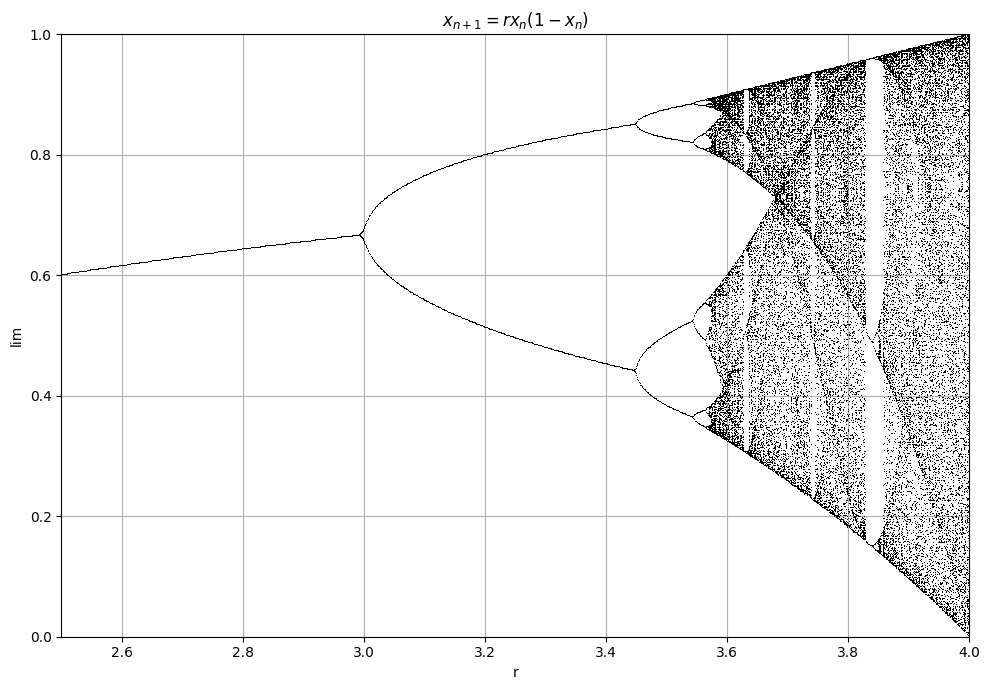

In [134]:
plt.rcParams["figure.figsize"] = [10.00, 7]
plt.rcParams["figure.autolayout"] = True

x_precision = 1000
xvals = [x/x_precision for x in range(2*x_precision,4*x_precision)]

dots_to_draw = []
for x in xvals:
    peaks = logistic_map_asymptotes(x, 0.1)
    [dots_to_draw.append((x, y)) for y in peaks]

plt.xlim(2.5, 4)
plt.ylim(0, 1)
plt.grid()
for pair in dots_to_draw:
        plt.plot(pair[0], pair[1], marker=",", markersize=1, markerfacecolor="black", markeredgecolor="black")

plt.title("$x_{n+1} = rx_n(1-x_n)$")
plt.xlabel("r")
plt.ylabel("lim")
plt.show()



Test the “ordinal pattern” program with some “hand made”
examples:

In [7]:
def ordinal_symbol(ts: list, lag=1):
    if ts[0]<ts[1]:
        symbol = 1 if ts[1]<ts[2] else (2 if ts[2]>ts[0] else 4)
    else:
        symbol = 6 if ts[1]>ts[2] else (3 if ts[2]>ts[0] else 5)
    return symbol

In [108]:
print(all([
ordinal_symbol([5,2,7]) == 3,
ordinal_symbol([2,3,1]) == 4,
ordinal_symbol([1,2,3]) == 1,
ordinal_symbol([10,2,5]) == 5]))

True


For the logistic map with r=3.99, calculate the probabilities of
the 6 D=3 ordinal patterns and plot the distribution:

In [3]:
def logistic_map_no_transients(r: float, x0: float, depth: int = 11000, y_range_tolerance: int = 3) -> list:
    import numpy as np
    import matplotlib.pyplot as plt
    ser = [x0]*depth
    peaks =  []
    
    for xi in range (depth-1):
        ser[xi+1] = r*ser[xi]*(1-ser[xi]) #Logistic map formula

    series = ser[800:]
    
    return series

In [4]:
def ordinal_probability(ordinal: int, r: float):
    s = logistic_map_no_transients(r, 0.1)
    syms = [ordinal_symbol(s[xi:xi+3])for xi in range(len(s)-3)] 
    return syms.count(ordinal)/len(s)

For the logistic map with r=3.99, calculate the probabilities
of the 6 D=3 ordinal patterns and plot the distribution.

Probability of D=3: 13.59%


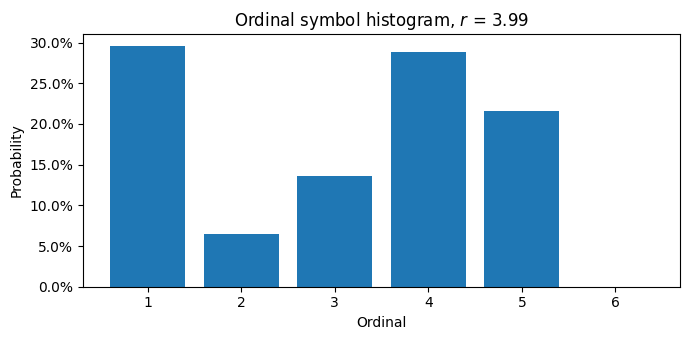

In [132]:
series = logistic_map_no_transients(3.99, 0.1)
logistics_map_symbols = [ordinal_symbol(series[xi:xi+3])for xi in range(len(series)-3)] 
print("Probability of D=3: " + str(round(100*ordinal_probability(3, 3.99), 2)) + "%")
counts = np.bincount(logistics_map_symbols, minlength=7)[1:] #removing first position because of 0-idxing
probabilities = counts / len(logistics_map_symbols)
plt.bar(range(1,7), probabilities)
plt.title(f"Ordinal symbol histogram, $r$ = 3.99")
plt.xlabel("Ordinal")
plt.ylabel("Probability")
# format the y-axis ticks as percentages
fmt = mtick.PercentFormatter(xmax=1)
plt.gca().yaxis.set_major_formatter(fmt)
plt.savefig("imgs/ord_hist.eps")
plt.show()

Calculate the ordinal bifurcation diagram with r in (3.5,4):

In [107]:
r_values = np.linspace(3.5, 4.0, 201)
def ordinal_distribution(r, x0 = 0.1):
    series = logistic_map_no_transients(r, x0)
    logistics_map_symbols = [ordinal_symbol(series[xi:xi+3])for xi in range(len(series)-3)] 
    counts = np.bincount(logistics_map_symbols, minlength=7)[1:] #removing first position because of 0-idxing
    probabilities = counts / len(logistics_map_symbols)
    return(probabilities)
ordinal_probabilities = np.transpose(np.array([ordinal_distribution(r) for r in r_values]))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


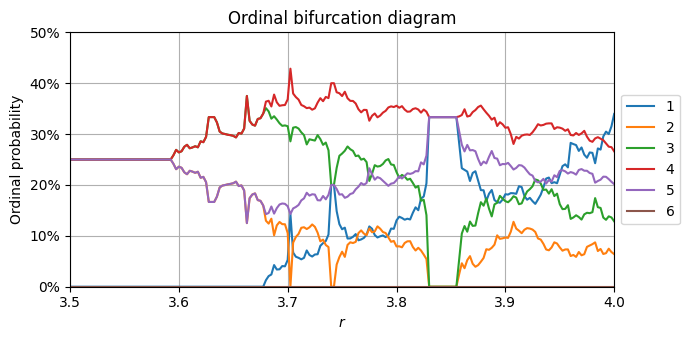

In [130]:

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

for ord, ordinal_data in enumerate(ordinal_probabilities):
        plt.plot(r_values, ordinal_data, label=str(ord+1))
    
plt.xlim(3.5, 4)
plt.ylim(0, 0.5)
plt.grid()

# format the y-axis ticks as percentages
fmt = mtick.PercentFormatter(xmax=1)
plt.gca().yaxis.set_major_formatter(fmt)

plt.title("Ordinal bifurcation diagram")
plt.xlabel("$r$")
plt.ylabel("Ordinal probability")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("imgs/ord_bif.eps")
plt.show()


In [97]:
def logistic_map(r: float, x0: float, depth: int) -> list:
    ser = [x0]*depth    
    for xi in range (depth-1):
        ser[xi+1] = r*ser[xi]*(1-ser[xi]) #Logistic map formula
    
    return ser

For r=3.99 generate two trajectories starting from very similar
initial conditions and calculate the sequence of ordinal patterns
and their distribution:

Text(0.5, 1.0, 'Logistic map initial trajectory for similar initial conditions')

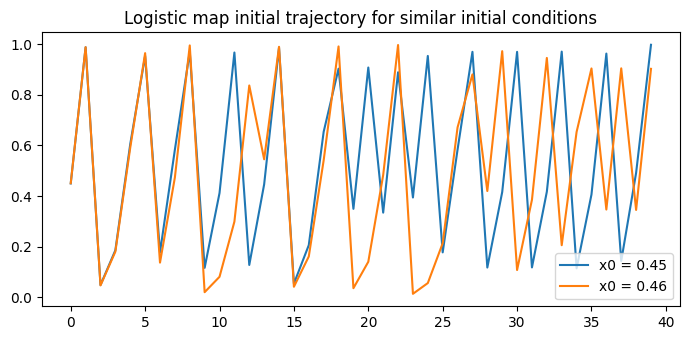

In [113]:
trajectory_1 = logistic_map(3.99, 0.45, 40)
trajectory_2 = logistic_map(3.99, 0.451, 40)

ordinal_traj_1 = [ordinal_symbol(trajectory_1[xi:xi+3])for xi in range(len(trajectory_1)-3)]
ordinal_traj_2 = [ordinal_symbol(trajectory_2[xi:xi+3])for xi in range(len(trajectory_2)-3)] 

plt.plot(trajectory_1,label="x0 = 0.45")
plt.plot(trajectory_2, label="x0 = 0.46")
plt.legend()
plt.title("Logistic map initial trajectory for similar initial conditions")



Clearly the time series are initially very similar but over time diverge

In [106]:
print(ordinal_traj_1)
print(ordinal_traj_2)

[4, 5, 1, 1, 4, 5, 1, 4, 5, 1, 4, 5, 1, 4, 5, 1, 1, 4, 3, 4, 5, 2, 3, 4, 5, 1, 4, 5, 1, 4, 5, 1, 4, 5, 1, 4, 5]
[4, 5, 1, 1, 4, 5, 1, 4, 5, 1, 4, 5, 2, 3, 4, 5, 1, 4, 5, 1, 4, 5, 1, 1, 4, 5, 1, 2, 3, 4, 5, 1, 4, 5, 1, 1, 4]


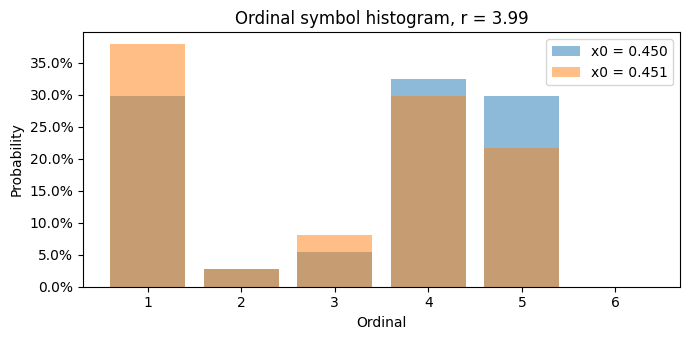

In [128]:
counts_traj_1 = np.bincount(ordinal_traj_1, minlength=7)[1:] #removing first position because of 0-idxing
probabilities_traj_1 = counts_traj_1 / len(ordinal_traj_1)

counts_traj_2 = np.bincount(ordinal_traj_2, minlength=7)[1:] #removing first position because of 0-idxing
probabilities_traj_2 = counts_traj_2 / len(ordinal_traj_2)

plt.bar(range(1,7), probabilities_traj_1, alpha=0.5, label="x0 = 0.450")
plt.bar(range(1,7), probabilities_traj_2, alpha=0.5, label="x0 = 0.451")

plt.title(f"Ordinal symbol histogram, r = 3.99")
plt.xlabel("Ordinal")
plt.ylabel("Probability")
plt.legend()
# format the y-axis ticks as percentages
fmt = mtick.PercentFormatter(xmax=1)
plt.gca().yaxis.set_major_formatter(fmt)
plt.show()


In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(ordinal_traj_1[:20])
plt.plot(ordinal_traj_2[:20])

plt.grid()

plt.title("x[n+1] = r[n](1-x[n])")
plt.xlabel("r")
plt.ylabel("lim")
plt.show()


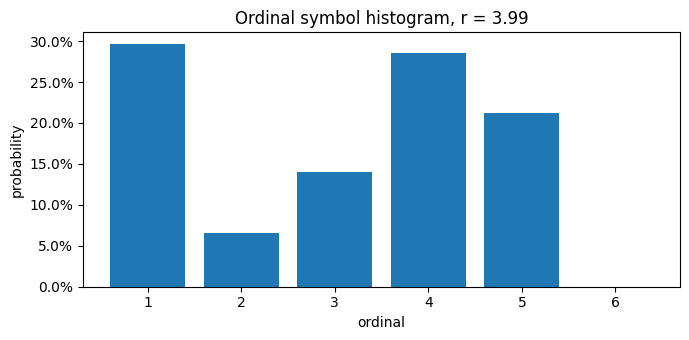

In [83]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

counts = np.bincount(ordinal_traj_1, minlength=7)[1:] #removing first position because of 0-idxing
probabilities = counts / len(logistics_map_symbols)
plt.bar(range(1,7), probabilities)
plt.title(f"Ordinal symbol histogram, r = 3.99, x_0 = 0.645")
plt.xlabel("ordinal")
plt.ylabel("probability")
# format the y-axis ticks as percentages
fmt = mtick.PercentFormatter(xmax=1)
plt.gca().yaxis.set_major_formatter(fmt)
plt.show()

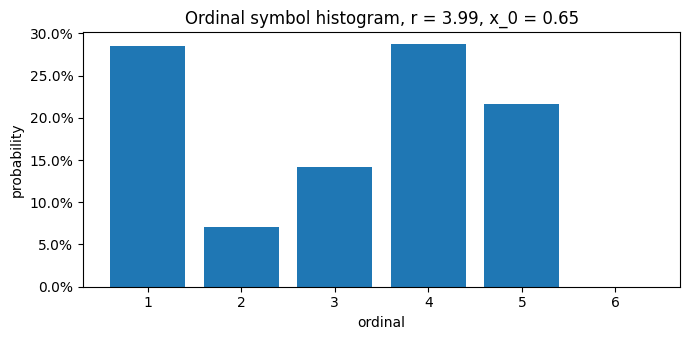

In [84]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

counts = np.bincount(ordinal_traj_2, minlength=7)[1:] #removing first position because of 0-idxing
probabilities = counts / len(logistics_map_symbols)
plt.bar(range(1,7), probabilities)
plt.title(f"Ordinal symbol histogram, r = 3.99, x_0 = 0.65")
plt.xlabel("ordinal")
plt.ylabel("probability")
# format the y-axis ticks as percentages
fmt = mtick.PercentFormatter(xmax=1)
plt.gca().yaxis.set_major_formatter(fmt)
plt.show()

1001
1001


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1001,)


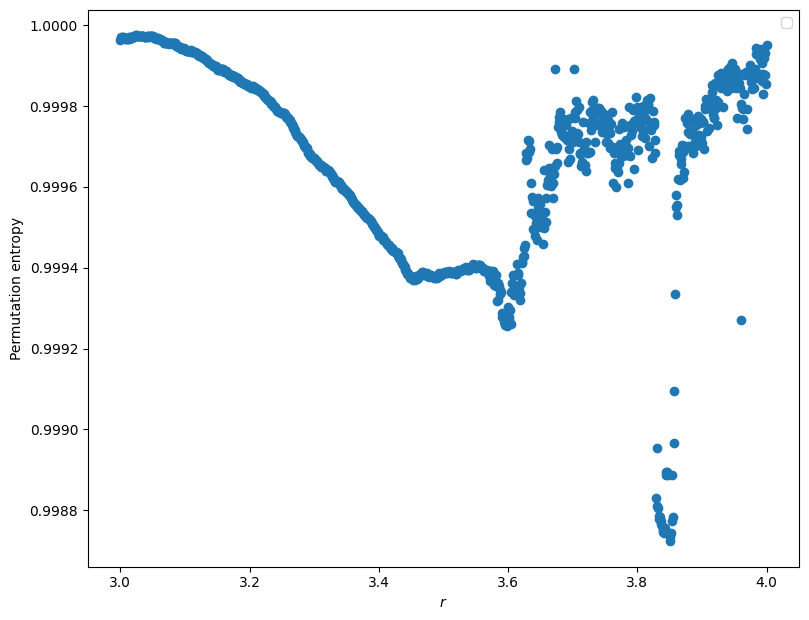

In [125]:
def logistic(a=4, n=100000, x0=0.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = a*x[i]*(1-x[i])
    return(x)

r_range = np.linspace(3, 4, 1001)

time_series = np.array([logistic(r) for r in r_range])
print(len(time_series))
time_series += [np.random.normal(size=100000)] # Add gaussian noise
print(len(time_series))

PE = [ordpy.permutation_entropy(series, dx=4) for series in time_series]
print(np.shape(PE))
f, ax = plt.subplots(figsize=(8.19, 6.3))

ax.plot(r_range, PE)

ax.set_xlabel('$r$')
ax.set_ylabel('Permutation entropy')

ax.legend()

In [127]:
PE = ordpy.permutation_entropy(time_series, dx=6, base=2, normalized=False)

f, ax = plt.subplots(figsize=(8.19, 6.3))

ax.plot(r_range, PE)

ax.set_xlabel('$r$')
ax.set_ylabel('Permutation entropy')

ax.legend()

KeyboardInterrupt: 